# Data Explorations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv('Lead Scoring.csv')
#remove ID features as well as features that have only 1 value (ex. all "No")
df = df.drop(columns=['Prospect ID','Lead Number','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                      'Get updates on DM Content','I agree to pay the amount through cheque'])
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [ ]:
df.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                      

In [ ]:
for col in df.columns:
  if df[col][0] == 'No':
    df[col] = [1 if value == 'Yes' else 0 for value in df[col]]

df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified


In [ ]:
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# lets apply this functino to our data with mincount=10
CombineRareCategories(df, 150)

df[0:10] #lets check the result

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Other_Last Activity,India,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified
5,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,NaN,NaN,NaN,NaN,01.High,02.Medium,17.0,15.0,0,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,...,Will revert after reading the email,Low in Relevance,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,Modified
7,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,NaN,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,Modified
8,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,India,...,NaN,NaN,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,1,Email Opened
9,API,Google,0,0,0,4.0,58,4.0,Email Opened,India,...,NaN,NaN,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,0,Email Opened


In [ ]:
df.corr(numeric_only=True)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview
Do Not Email,1.000000,-0.004322,-0.135580,0.033842,-0.046374,0.033582,-0.011443,-0.004322,-0.003056,-0.003056,-0.006113,-0.008088,-0.046682,-0.015582,0.055762
Do Not Call,-0.004322,1.000000,0.018581,0.003221,0.006801,-0.005918,-0.000573,-0.000216,-0.000153,-0.000153,-0.000306,-0.000405,0.017185,0.001709,-0.009921
Converted,-0.135580,0.018581,1.000000,0.030395,0.362483,-0.003328,-0.002261,0.003465,-0.008238,-0.008238,-0.005789,0.018607,0.167962,0.218571,-0.039820
TotalVisits,0.033842,0.003221,0.030395,1.000000,0.221240,0.512125,0.049527,0.033757,0.035744,0.014153,0.023991,0.034191,-0.058514,0.130887,0.202273
Total Time Spent on Website,-0.046374,0.006801,0.362483,0.221240,1.000000,0.320361,0.012654,0.011326,0.006195,0.025142,0.007607,0.023186,-0.065287,0.175589,0.168298
Page Views Per Visit,0.033582,-0.005918,-0.003328,0.512125,0.320361,1.000000,0.033258,0.023232,0.000665,0.004691,0.021945,0.019822,-0.162892,0.161254,0.277263
Search,-0.011443,-0.000573,-0.002261,0.049527,0.012654,0.033258,1.000000,0.188573,0.267073,-0.000405,0.132950,0.302318,-0.004403,0.007620,-0.002256
Newspaper Article,-0.004322,-0.000216,0.003465,0.033757,0.011326,0.023232,0.188573,1.000000,0.707069,-0.000153,0.353362,0.266986,0.007061,0.005105,0.005950
X Education Forums,-0.003056,-0.000153,-0.008238,0.035744,0.006195,0.000665,0.267073,0.707069,1.000000,-0.000108,0.499919,0.377842,NaN,NaN,0.015429
Newspaper,-0.003056,-0.000153,-0.008238,0.014153,0.025142,0.004691,-0.000405,-0.000153,-0.000108,1.000000,-0.000217,-0.000286,NaN,NaN,-0.007015


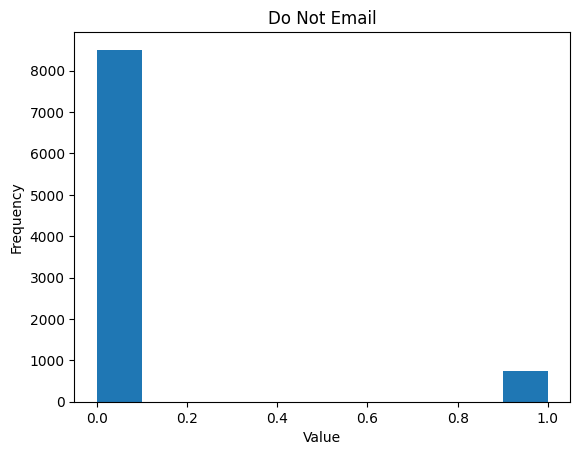

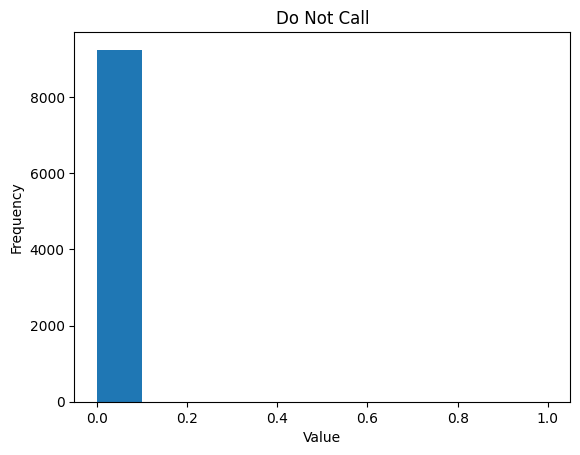

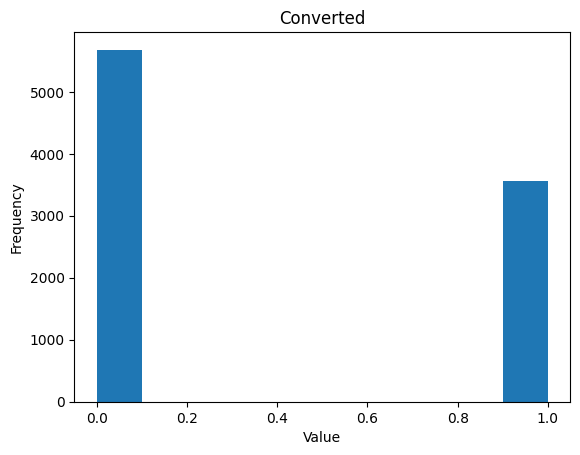

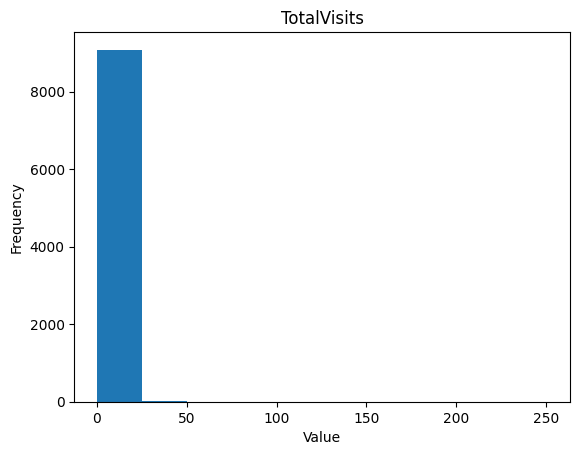

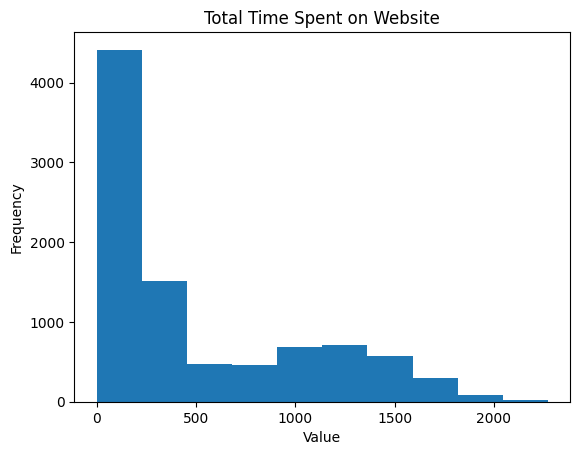

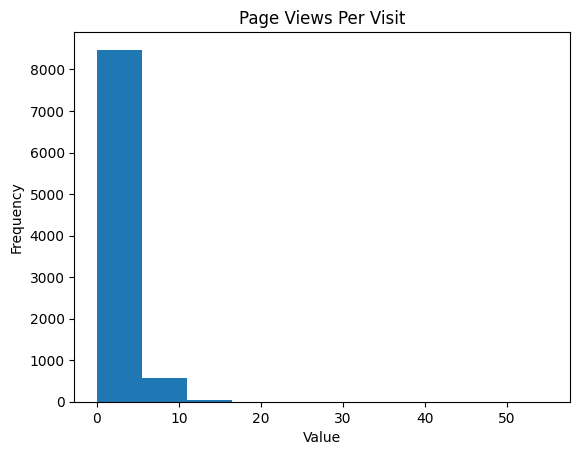

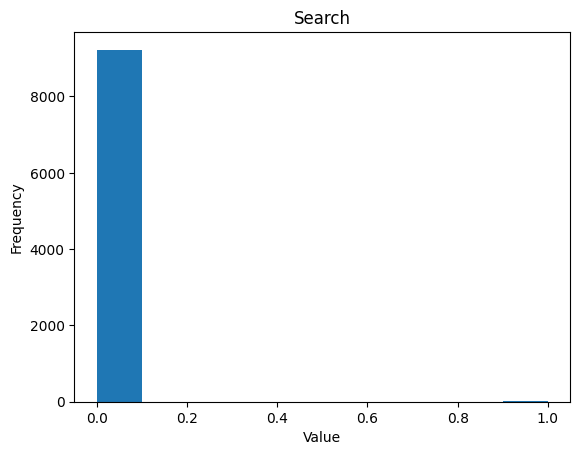

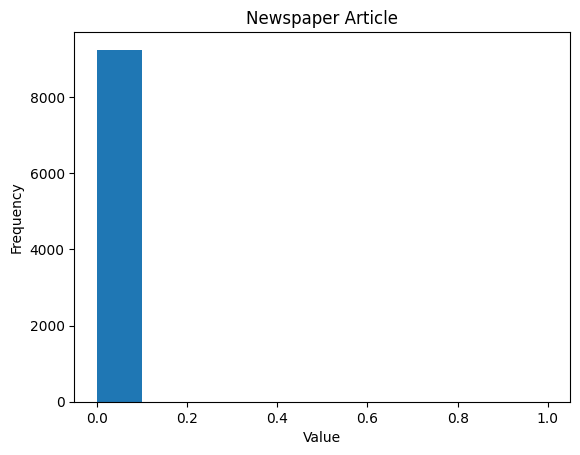

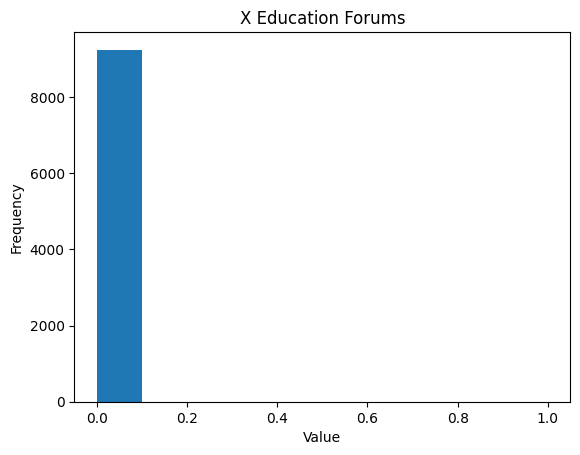

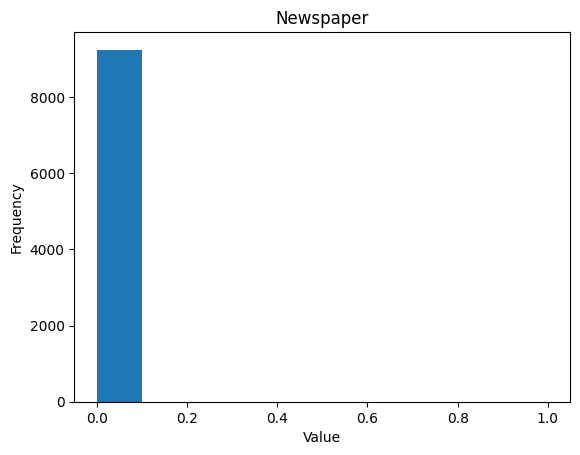

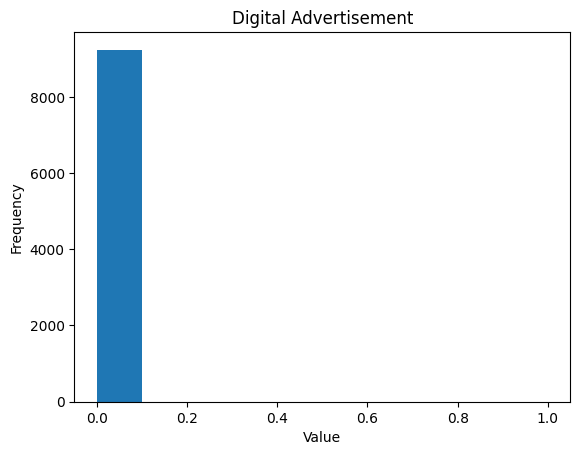

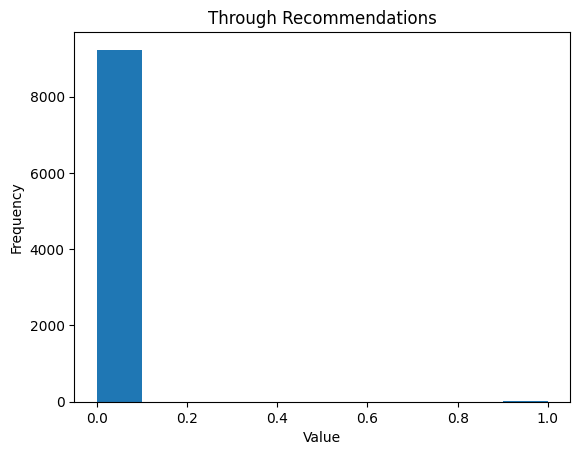

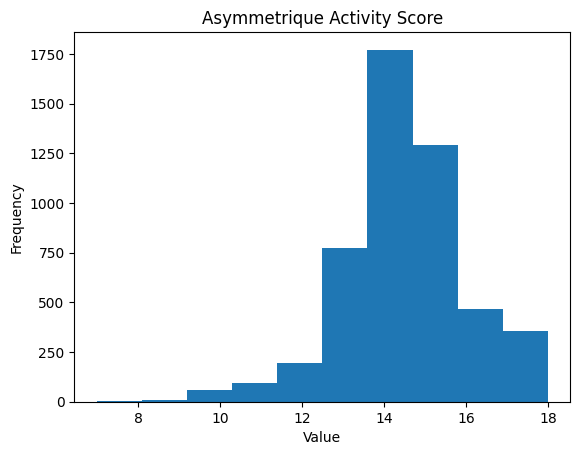

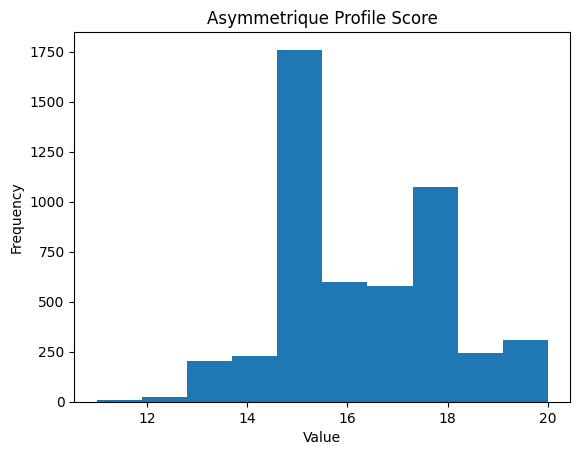

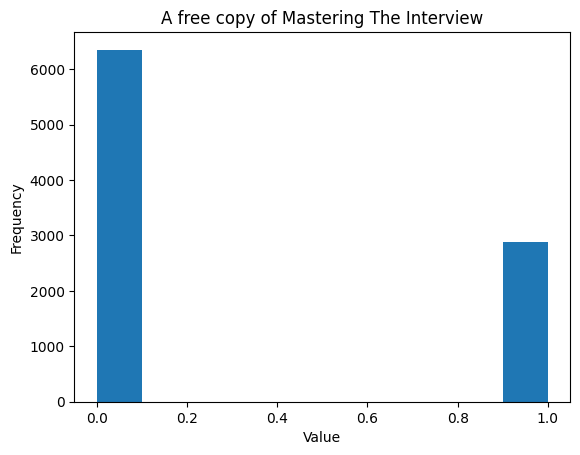

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Create a separate histogram for each column
for column in df.columns:
  if df[column].dtypes in (np.int64, np.float64):
    plt.figure()  # Create a new figure for each column
    df[column].plot(kind='hist', bins=10, title=column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

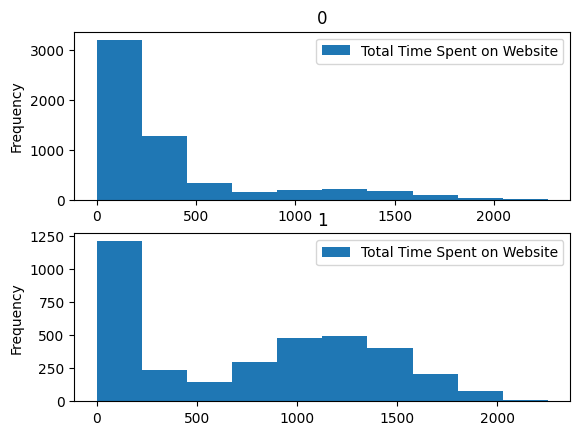

In [ ]:
df.plot.hist(column='Total Time Spent on Website',by='Converted')

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

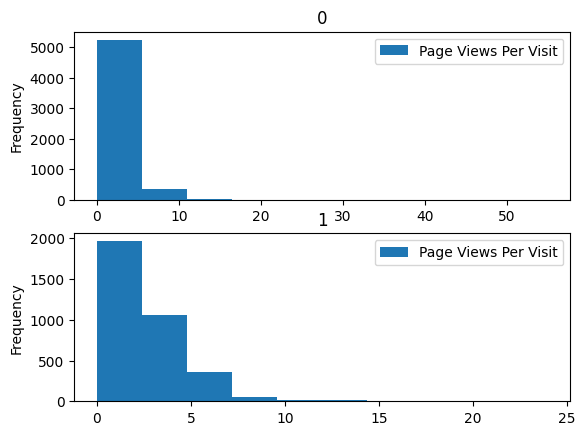

In [ ]:
df.plot.hist(column='Page Views Per Visit',by='Converted')

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

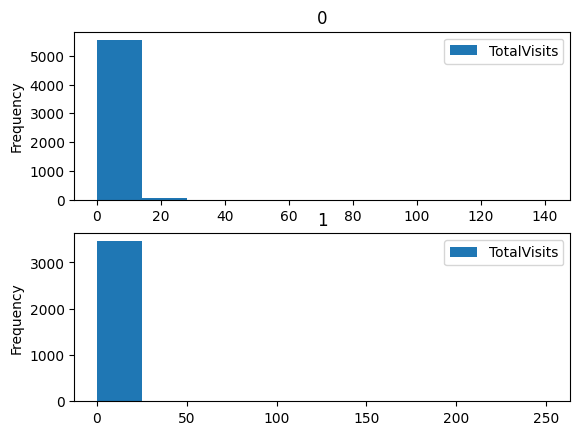

In [ ]:
df.plot.hist(column='TotalVisits',by='Converted')

In [ ]:
converted = df.copy()
converted = converted.loc[converted['Converted']==1]

not_converted = df.copy()
not_converted = not_converted.loc[not_converted['Converted']==0]


def compute_metrics(df, column_names):
  for i in column_names:
    mean = np.mean(df[i].fillna(0))
    median = np.percentile(df[i].fillna(0),50)
    print(f'Mean {i}: {mean}')
    print(f'Median {i}: {median}')

print('Conveted Leads')
compute_metrics(converted, ['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
print('\nNon Converted Leads')
compute_metrics(not_converted, ['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])

Conveted Leads
Mean TotalVisits: 3.531592249368155
Median TotalVisits: 3.0
Mean Total Time Spent on Website: 738.5467565290649
Median Total Time Spent on Website: 832.0
Mean Page Views Per Visit: 2.2875428250491434
Median Page Views Per Visit: 2.0

Non Converted Leads
Mean TotalVisits: 3.3079767564712097
Median TotalVisits: 3.0
Mean Total Time Spent on Website: 330.4044726184187
Median Total Time Spent on Website: 179.0
Mean Page Views Per Visit: 2.3530216587427364
Median Page Views Per Visit: 2.0


In [ ]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

# Initial Model

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

X = df.drop(columns=['Converted'])
y = df['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
#categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


logistic_model = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear',penalty='l1')
dt_model = DecisionTreeClassifier()

logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', logistic_model)
                             ])


print('Logistic Classifier Report: \n')
logistic_clf = logistic_pipeline.fit(X_train,y_train)
y_pred = logistic_clf.predict(X_test)
print(classification_report(y_test, y_pred))

Logistic Classifier Report: 

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1107
           1       0.93      0.94      0.93       741

    accuracy                           0.95      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.95      0.95      0.95      1848



In [ ]:
X = df.drop(columns=['Converted'])
y = df['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
#categorical_cols = [cname for cname in X.columns if X[cname].nunique() < 10 and X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_transformed = preprocessor.fit_transform(X)

lr = LogisticRegression(solver='liblinear' ,penalty='l1' ,random_state=42, class_weight='balanced')
lr.fit(X_transformed,y)

lr.coef_

array([[-8.00528071e-01,  0.00000000e+00,  2.30081188e-02,
         2.00212677e-03, -5.21222827e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  8.10702192e-01,
        -2.25850325e-01,  5.48125054e-02,  0.00000000e+00,
        -5.13892890e-01,  1.58293458e+00, -1.15411723e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.82319369e-02,  1.23089250e-01,  0.00000000e+00,
        -1.82984836e+00, -8.31940114e-01, -1.32153110e+00,
         1.03835807e-01,  0.00000000e+00,  0.00000000e+00,
        -1.14132599e+00,  4.75996533e-02, -5.80487663e-01,
         1.26206149e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.01913451e+00,  0.00000000e+00,
         0.00000000e+00, -3.28973983e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [ ]:
coefficients = list(zip(preprocessor.get_feature_names_out(X.columns), lr.coef_[0]))

In [ ]:
for i in coefficients:
  feature = i[0]
  log_odd_impacts = (np.exp(i[1]) - 1) * 100
  print(f'For each 1 unit increase in {feature} there is an {log_odd_impacts}% increase in the odd of conversion (all else equal)')

For each 1 unit increase in num__Do Not Email there is an -55.09082507842273% increase in the odd of conversion (all else equal)
For each 1 unit increase in num__Do Not Call there is an 0.0% increase in the odd of conversion (all else equal)
For each 1 unit increase in num__TotalVisits there is an 2.327484724115081% increase in the odd of conversion (all else equal)
For each 1 unit increase in num__Total Time Spent on Website there is an 0.2004132364001654% increase in the odd of conversion (all else equal)
For each 1 unit increase in num__Page Views Per Visit there is an -5.078721254618246% increase in the odd of conversion (all else equal)
For each 1 unit increase in num__Search there is an 0.0% increase in the odd of conversion (all else equal)
For each 1 unit increase in num__Newspaper Article there is an 0.0% increase in the odd of conversion (all else equal)
For each 1 unit increase in num__X Education Forums there is an 0.0% increase in the odd of conversion (all else equal)
For

# Final Model

In [ ]:
#Run again without lead scoring
df = pd.read_csv('Lead Scoring.csv')

#drop ID columns, columns with only 1 value (ie. all "No"), and columns that represent lead scoring or review assessment (may not be available at the time the lead comes in)
df = df.drop(columns=['Prospect ID','Lead Number','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                      'Get updates on DM Content','I agree to pay the amount through cheque',
                      'Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Asymmetrique Profile Score', 'Lead Quality','Tags'])

#Change Yes/No columns to 1/0
for col in df.columns:
  if df[col][0] == 'No':
    df[col] = [1 if value == 'Yes' else 0 for value in df[col]]


#Combine rara categories into "other"
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# lets apply this functino to our data with mincount=10
CombineRareCategories(df, 150)
#CombineRareCategories(df, 10)

df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,...,0,0,0,0,0,0,Select,Select,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,Select,Select,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,Potential Lead,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Other_Last Activity,India,...,0,0,0,0,0,0,Select,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,0,0,0,Select,Mumbai,0,Modified


In [ ]:
#summary by lead origin
rollup = df.groupby(['Lead Origin', 'Converted']).size().reset_index(name='Count')
rollup = rollup.pivot(index='Lead Origin', columns='Converted', values='Count').fillna(0)
rollup['Conversion Rate'] = rollup[1]/(rollup[0]+rollup[1])
rollup

Converted,0,1,Conversion Rate
Lead Origin,,,
API,2465,1115,0.311453
Landing Page Submission,3118,1768,0.361850
Lead Add Form,54,664,0.924791
Other_Lead Origin,42,14,0.250000


In [ ]:
#summary by lead source
rollup = df.groupby(['Lead Source', 'Converted']).size().reset_index(name='Count')
rollup = rollup.pivot(index='Lead Source', columns='Converted', values='Count').fillna(0)
rollup['Conversion Rate'] = rollup[1]/(rollup[0]+rollup[1])
rollup['conversion_odds'] = rollup['Conversion Rate']/(1-rollup['Conversion Rate'])
rollup.sort_values('Conversion Rate', ascending=False)

Converted,0,1,Conversion Rate,conversion_odds
Lead Source,,,,
Reference,44,490,0.917603,11.136364
Other_Lead Source,157,193,0.551429,1.229299
Google,1721,1147,0.399930,0.666473
Organic Search,718,436,0.377816,0.607242
Direct Traffic,1725,818,0.321667,0.474203
Olark Chat,1307,448,0.255271,0.342770


In [ ]:
#revenue and cost variable assumptions
revenue_per_course = 199 #sell each course for $199
non_marketing_sales_activity_costs_won = 15 # $15 of sales resources for closed won leads
non_marketing_sales_activity_costs_lost = 10 # $10 of sales resources for closed lost leads

# CPC order [Direct Traffic, Facebook, Google, Olark Chat, Organic Search, Other, Reference, Referral, Welingak Website]
#cpc = [0.6, 1.85, 2.0, 0.5, 1.9, 0.75, 1.1, 1.2, .8]
cpc = [1.1,2.0,1.15,1.9,0.6,0.5]
#calculate ROI table
grid = rollup.copy()
grid['Total Leads'] = rollup[0]+rollup[1]
grid['Total Course Sold'] = grid[1]
grid['Total Revenue'] = grid[1] * revenue_per_course
grid['Cost Per Click'] = cpc
grid['Marketing Spend'] = grid['Total Leads'] * grid['Cost Per Click']
grid['Sales Costs'] = grid['Total Course Sold'] * non_marketing_sales_activity_costs_won + grid[0] * non_marketing_sales_activity_costs_lost
grid['marketing_ROI'] = (grid['Total Revenue']/grid['Marketing Spend']) - 1
grid['Total ROI'] = (grid['Total Revenue']/(grid['Marketing Spend'] + grid['Sales Costs'])) - 1
grid

#marketing spend/acquisition cost - settle on terminology

Converted,0,1,Conversion Rate,conversion_odds,Total Leads,Total Course Sold,Total Revenue,Cost Per Click,Marketing Spend,Sales Costs,marketing_ROI,Total ROI
Lead Source,,,,,,,,,,,,
Direct Traffic,1725,818,0.321667,0.474203,2543,818,162782,1.10,2797.30,29520,57.192543,4.036993
Google,1721,1147,0.399930,0.666473,2868,1147,228253,2.00,5736.00,34415,38.793061,4.684865
Olark Chat,1307,448,0.255271,0.342770,1755,448,89152,1.15,2018.25,19790,43.172922,3.087994
Organic Search,718,436,0.377816,0.607242,1154,436,86764,1.90,2192.60,13720,38.571285,4.452534
Other_Lead Source,157,193,0.551429,1.229299,350,193,38407,0.60,210.00,4465,181.890476,7.215401
Reference,44,490,0.917603,11.136364,534,490,97510,0.50,267.00,7790,364.205993,11.102520


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

X = df.drop(columns=['Converted'])
y = df['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Initialize logistic regression
logistic_model = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear',penalty='l1')

# Create pipeline
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', logistic_model)
                             ])

# Logistic Classifier Report
print('Logistic Classifier Report: \n')
logistic_clf = logistic_pipeline.fit(X_train,y_train)
y_pred = logistic_clf.predict(X_test)
print(classification_report(y_test, y_pred))

Logistic Classifier Report: 

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1107
           1       0.78      0.83      0.80       741

    accuracy                           0.84      1848
   macro avg       0.83      0.84      0.83      1848
weighted avg       0.84      0.84      0.84      1848



In [ ]:
# Recreate the above cell model, on the entire dataset and get the coefficients

X = df.drop(columns=['Converted'])
y = df['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_transformed = preprocessor.fit_transform(X)

lr = LogisticRegression(solver='liblinear' ,penalty='l1' ,random_state=42, class_weight='balanced')
lr.fit(X_transformed,y)

lr.coef_

array([[-1.34720682e+00,  0.00000000e+00,  3.41648900e-02,
         2.07763686e-03, -7.71954480e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.28693619e-02,
         0.00000000e+00, -7.19084052e-01,  3.37520823e+00,
        -6.80331049e-01, -2.38267044e-01,  0.00000000e+00,
        -2.86053638e-01,  2.70949574e-01, -4.85949686e-02,
         9.15030292e-03, -1.47151143e+00, -3.86543243e-01,
        -7.38297074e-01,  0.00000000e+00,  4.42494856e-01,
        -8.88234609e-01, -8.49177351e-01,  1.90148319e-01,
         0.00000000e+00,  9.85416066e-01,  0.00000000e+00,
        -2.57920960e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00300612e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [ ]:
# translate the coefficients (change to log-odd) into percentage impact on odds of success (conversion)

coefficients = list(zip(preprocessor.get_feature_names_out(X.columns), lr.coef_[0]))

for i in coefficients:
  if i[1] != 0:
    feature = i[0]
    log_odd_impacts = (np.exp(i[1]) - 1) * 100
    print(f'For each 1 unit increase in {feature} there is an {log_odd_impacts}% increase in the odd of conversion (all else equal)')

print('All other features eliminated through regularization')

For each 1 unit increase in num__Do Not Email there is an -74.00346236276403% increase in the odd of conversion (all else equal)
For each 1 unit increase in num__TotalVisits there is an 3.4755213454894296% increase in the odd of conversion (all else equal)
For each 1 unit increase in num__Total Time Spent on Website there is an 0.20797966385175393% increase in the odd of conversion (all else equal)
For each 1 unit increase in num__Page Views Per Visit there is an -7.429109200358397% increase in the odd of conversion (all else equal)
For each 1 unit increase in num__A free copy of Mastering The Interview there is an -3.2335034795915263% increase in the odd of conversion (all else equal)
For each 1 unit increase in cat__Lead Origin_Landing Page Submission there is an -51.28016998976792% increase in the odd of conversion (all else equal)
For each 1 unit increase in cat__Lead Origin_Lead Add Form there is an 2823.0369711786598% increase in the odd of conversion (all else equal)
For each 1 

In [ ]:
# Top 10 variables by increase in odds of conversion

log_odds_df = pd.DataFrame(coefficients, columns=['feature_name','odds_impact']).sort_values('odds_impact', ascending=False)
log_odds_df['odds_impact'] = ((np.exp(log_odds_df['odds_impact'])) - 1) * 100

log_odds_df.head(10)

,feature_name,odds_impact
14,cat__Lead Origin_Lead Add Form,2823.036971
104,cat__Lead Profile_Other_Lead Profile,1098.694386
120,cat__Last Notable Activity_Other_Last Notable ...,358.090222
98,cat__What is your current occupation_Working P...,290.634166
105,cat__Lead Profile_Potential Lead,234.301391
51,cat__Country_Missing,179.722601
31,cat__Last Activity_SMS Sent,167.892626
122,cat__Last Notable Activity_SMS Sent,131.279312
108,cat__City_Missing,66.888280
26,cat__Last Activity_Email Opened,55.658584


In [ ]:
# Bottom 10 variables by increase in odds of conversion

log_odds_df.tail(10)

,feature_name,odds_impact
100,cat__What matters most to you in choosing a co...,-55.036666
97,cat__What is your current occupation_Unemployed,-55.444701
58,cat__Country_Saudi Arabia,-55.646276
28,cat__Last Activity_Olark Chat Conversation,-57.223331
27,cat__Last Activity_Missing,-58.861864
102,cat__Lead Profile_Missing,-72.835573
0,num__Do Not Email,-74.003462
22,cat__Lead Source_Reference,-77.042177
80,cat__Specialization_Missing,-80.808213
107,cat__Lead Profile_Student of SomeSchool,-92.543803


# Lead Source Experiments

In [ ]:
!pip install psmpy

In [ ]:
#Run again without lead scoring
df = pd.read_csv('Lead Scoring.csv')

#drop ID columns, columns with only 1 value (ie. all "No"), and columns that represent lead scoring or review assessment (may not be available at the time the lead comes in)
df = df.drop(columns=['Prospect ID','Lead Number','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                      'Get updates on DM Content','I agree to pay the amount through cheque',
                      'Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Asymmetrique Profile Score', 'Lead Quality','Tags'])

#Change Yes/No columns to 1/0
for col in df.columns:
  if df[col][0] == 'No':
    df[col] = [1 if value == 'Yes' else 0 for value in df[col]]


#Combine rara categories into "other"
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# lets apply this functino to our data with mincount=10
#CombineRareCategories(df, 10)
CombineRareCategories(df, 150)

df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,...,0,0,0,0,0,0,Select,Select,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,Select,Select,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,Potential Lead,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Other_Last Activity,India,...,0,0,0,0,0,0,Select,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,0,0,0,Select,Mumbai,0,Modified


In [ ]:
exp_df = df.loc[(df['Lead Source']== 'Direct Traffic') | (df['Lead Source']== 'Google')].reset_index(drop=True)
exp_df['Lead Source Encoded'] = [1 if exp_df['Lead Source'][i] == 'Google' else 0 for i in range(len(exp_df['Lead Source']))]
exp_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Source Encoded
0,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,Potential Lead,Mumbai,1,Email Opened,0
1,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Other_Last Activity,India,...,0,0,0,0,0,Select,Mumbai,0,Modified,0
2,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,0,0,Select,Mumbai,0,Modified,1
3,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,...,0,0,0,0,0,Potential Lead,Mumbai,0,Modified,1
4,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,India,...,0,0,0,0,0,NaN,Thane & Outskirts,1,Email Opened,0


In [ ]:
#Run again without lead scoring
df = pd.read_csv('Lead Scoring.csv')

#drop ID columns, columns with only 1 value (ie. all "No"), and columns that represent lead scoring or review assessment (may not be available at the time the lead comes in)
df = df.drop(columns=['Prospect ID','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                      'Get updates on DM Content','I agree to pay the amount through cheque',
                      'Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Asymmetrique Profile Score', 'Lead Quality','Tags'])

# Recreate the above cell model, on the entire dataset and get the coefficients

X = df.drop(columns=['Converted','Lead Number'])
y = df['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_transformed = preprocessor.fit_transform(X)

transformed_df = pd.DataFrame(X_transformed.toarray(),columns=preprocessor.get_feature_names_out(X.columns))
transformed_df['Converted'] = y
transformed_df['Lead Number'] = df['Lead Number']
transformed_df = transformed_df.set_index('Lead Number')
transformed_df.head()

,num__TotalVisits,num__Total Time Spent on Website,num__Page Views Per Visit,cat__Lead Origin_API,cat__Lead Origin_Landing Page Submission,cat__Lead Origin_Lead Add Form,cat__Lead Origin_Lead Import,cat__Lead Origin_Quick Add Form,cat__Lead Source_Click2call,cat__Lead Source_Direct Traffic,...,cat__Last Notable Activity_Had a Phone Conversation,cat__Last Notable Activity_Modified,cat__Last Notable Activity_Olark Chat Conversation,cat__Last Notable Activity_Page Visited on Website,cat__Last Notable Activity_Resubscribed to emails,cat__Last Notable Activity_SMS Sent,cat__Last Notable Activity_Unreachable,cat__Last Notable Activity_Unsubscribed,cat__Last Notable Activity_View in browser link Clicked,Converted
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
660728,5.0,674.0,2.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
660727,2.0,1532.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
660719,1.0,305.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
660681,2.0,1428.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
coefficients = list(zip(preprocessor.get_feature_names_out(X.columns), lr.coef_[0]))

important_features = []

for i in coefficients:
  if i[1] != 0:
    important_features.append(i[0])

important_features
important_features.append('cat__Lead Source_Direct Traffic')
important_features.append('Converted')

In [ ]:
exp_df = transformed_df[important_features]
exp_df = exp_df.loc[(exp_df['cat__Lead Source_Google'] == 1.0) | (exp_df['cat__Lead Source_Direct Traffic'] == 1.0)]
exp_df

,num__TotalVisits,num__Page Views Per Visit,cat__Lead Origin_API,cat__Lead Origin_Landing Page Submission,cat__Lead Source_Google,cat__Lead Source_Missing,cat__Lead Source_NC_EDM,cat__Lead Source_Olark Chat,cat__Lead Source_Organic Search,cat__Lead Source_Press_Release,...,cat__How did you hear about X Education_Email,cat__How did you hear about X Education_Missing,cat__How did you hear about X Education_Multiple Sources,cat__How did you hear about X Education_Online Search,cat__How did you hear about X Education_SMS,cat__How did you hear about X Education_Select,cat__How did you hear about X Education_Student of SomeSchool,cat__What is your current occupation_Businessman,cat__Lead Source_Direct Traffic,Converted
Lead Number,,,,,,,,,,,,,,,,,,,,,
660727,2.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
660719,1.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
660681,2.0,1.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
660673,2.0,2.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
660624,2.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579564,8.0,2.67,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
579546,2.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
579545,2.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [ ]:
exp_df['Lead Source Encoded'] = [1 if exp_df['cat__Lead Source_Google'][i] == 1.0 else 0 for i in exp_df.index]
exp_df

,num__TotalVisits,num__Page Views Per Visit,cat__Lead Origin_API,cat__Lead Origin_Landing Page Submission,cat__Lead Source_Google,cat__Lead Source_Missing,cat__Lead Source_NC_EDM,cat__Lead Source_Olark Chat,cat__Lead Source_Organic Search,cat__Lead Source_Press_Release,...,cat__How did you hear about X Education_Missing,cat__How did you hear about X Education_Multiple Sources,cat__How did you hear about X Education_Online Search,cat__How did you hear about X Education_SMS,cat__How did you hear about X Education_Select,cat__How did you hear about X Education_Student of SomeSchool,cat__What is your current occupation_Businessman,cat__Lead Source_Direct Traffic,Converted,Lead Source Encoded
Lead Number,,,,,,,,,,,,,,,,,,,,,
660727,2.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0
660719,1.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
660681,2.0,1.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
660673,2.0,2.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
660624,2.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579564,8.0,2.67,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0
579546,2.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
579545,2.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0


In [ ]:
drop_columns=[]

for i in exp_df.columns:
  if i == 'Lead Source Encoded':
    continue
  elif 'Lead Origin' in i:
    drop_columns.append(i)
  elif 'Lead Source' in i and i != 'Lead Source Encoded':
    drop_columns.append(i)

drop_columns

['cat__Lead Origin_API',
 'cat__Lead Origin_Landing Page Submission',
 'cat__Lead Source_Google',
 'cat__Lead Source_Missing',
 'cat__Lead Source_NC_EDM',
 'cat__Lead Source_Olark Chat',
 'cat__Lead Source_Organic Search',
 'cat__Lead Source_Press_Release',
 'cat__Lead Source_Reference',
 'cat__Lead Source_Referral Sites',
 'cat__Lead Source_Social Media',
 'cat__Lead Source_WeLearn',
 'cat__Lead Source_Welingak Website',
 'cat__Lead Source_bing',
 'cat__Lead Source_google',
 'cat__Lead Source_testone',
 'cat__Lead Source_welearnblog_Home',
 'cat__Lead Source_youtubechannel',
 'cat__Lead Source_Direct Traffic']

In [ ]:
exp_df = exp_df.drop(columns=drop_columns)
exp_df = exp_df.reset_index()
exp_df

,Lead Number,num__TotalVisits,num__Page Views Per Visit,cat__Do Not Email_Yes,cat__Do Not Call_Yes,cat__Last Activity_Olark Chat Conversation,cat__Last Activity_Visited Booth in Tradeshow,cat__Country_Australia,cat__Country_Bahrain,cat__Country_Belgium,...,cat__How did you hear about X Education_Email,cat__How did you hear about X Education_Missing,cat__How did you hear about X Education_Multiple Sources,cat__How did you hear about X Education_Online Search,cat__How did you hear about X Education_SMS,cat__How did you hear about X Education_Select,cat__How did you hear about X Education_Student of SomeSchool,cat__What is your current occupation_Businessman,Converted,Lead Source Encoded
0,660727,2.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
1,660719,1.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,660681,2.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,660673,2.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1
4,660624,2.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,579564,8.0,2.67,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
5407,579546,2.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
5408,579545,2.0,2.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
5409,579538,3.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1


In [ ]:
from psmpy import PsmPy

psm = PsmPy(exp_df, treatment='Lead Source Encoded',indx='Lead Number', exclude=['Converted'])
psm.logistic_ps(balance = True)

In [ ]:
psm.predicted_data

,Lead Number,num__TotalVisits,num__Page Views Per Visit,cat__Do Not Email_Yes,cat__Do Not Call_Yes,cat__Last Activity_Olark Chat Conversation,cat__Last Activity_Visited Booth in Tradeshow,cat__Country_Australia,cat__Country_Bahrain,cat__Country_Belgium,...,cat__How did you hear about X Education_Missing,cat__How did you hear about X Education_Multiple Sources,cat__How did you hear about X Education_Online Search,cat__How did you hear about X Education_SMS,cat__How did you hear about X Education_Select,cat__How did you hear about X Education_Student of SomeSchool,cat__What is your current occupation_Businessman,propensity_score,propensity_logit,Lead Source Encoded
0,658852,3.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.131649,-1.886454,0
1,658089,1.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.676963,0.739849,0
2,658081,7.0,3.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.694499,0.821237,0
3,657823,5.0,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.144925,-1.774974,0
4,657313,2.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.089231,-2.323067,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,579728,5.0,1.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.748036,1.088164,1
5407,579717,4.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.157286,-1.678565,1
5408,579701,2.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.848083,1.719647,1
5409,579697,8.0,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.781873,1.276613,1


In [ ]:
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=0.2, drop_unmatched=True)

/usr/local/lib/python3.10/dist-packages/psmpy/psmpy.py:363: UserWarning: Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False
  warnings.warn('Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False')


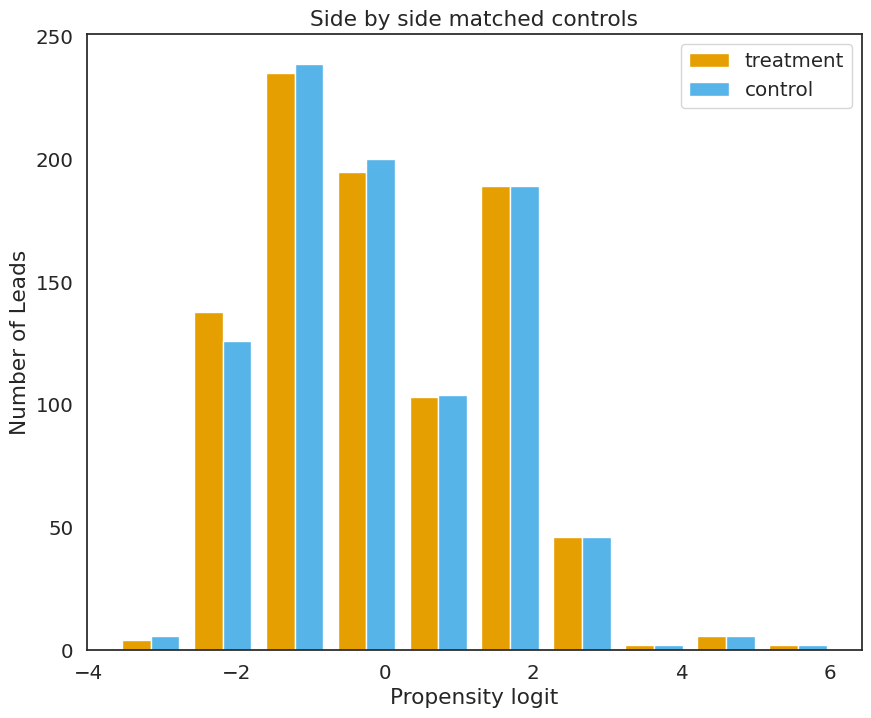

In [ ]:
from psmpy.plotting import *
sns.set(rc={'figure.figsize':(10,8)}, font_scale = 1.3)

psm.plot_match(Title='Side by side matched controls', Ylabel='Number of Leads', Xlabel= 'Propensity logit', names = ['treatment', 'control'], colors=['#E69F00', '#56B4E9'] ,save=True)

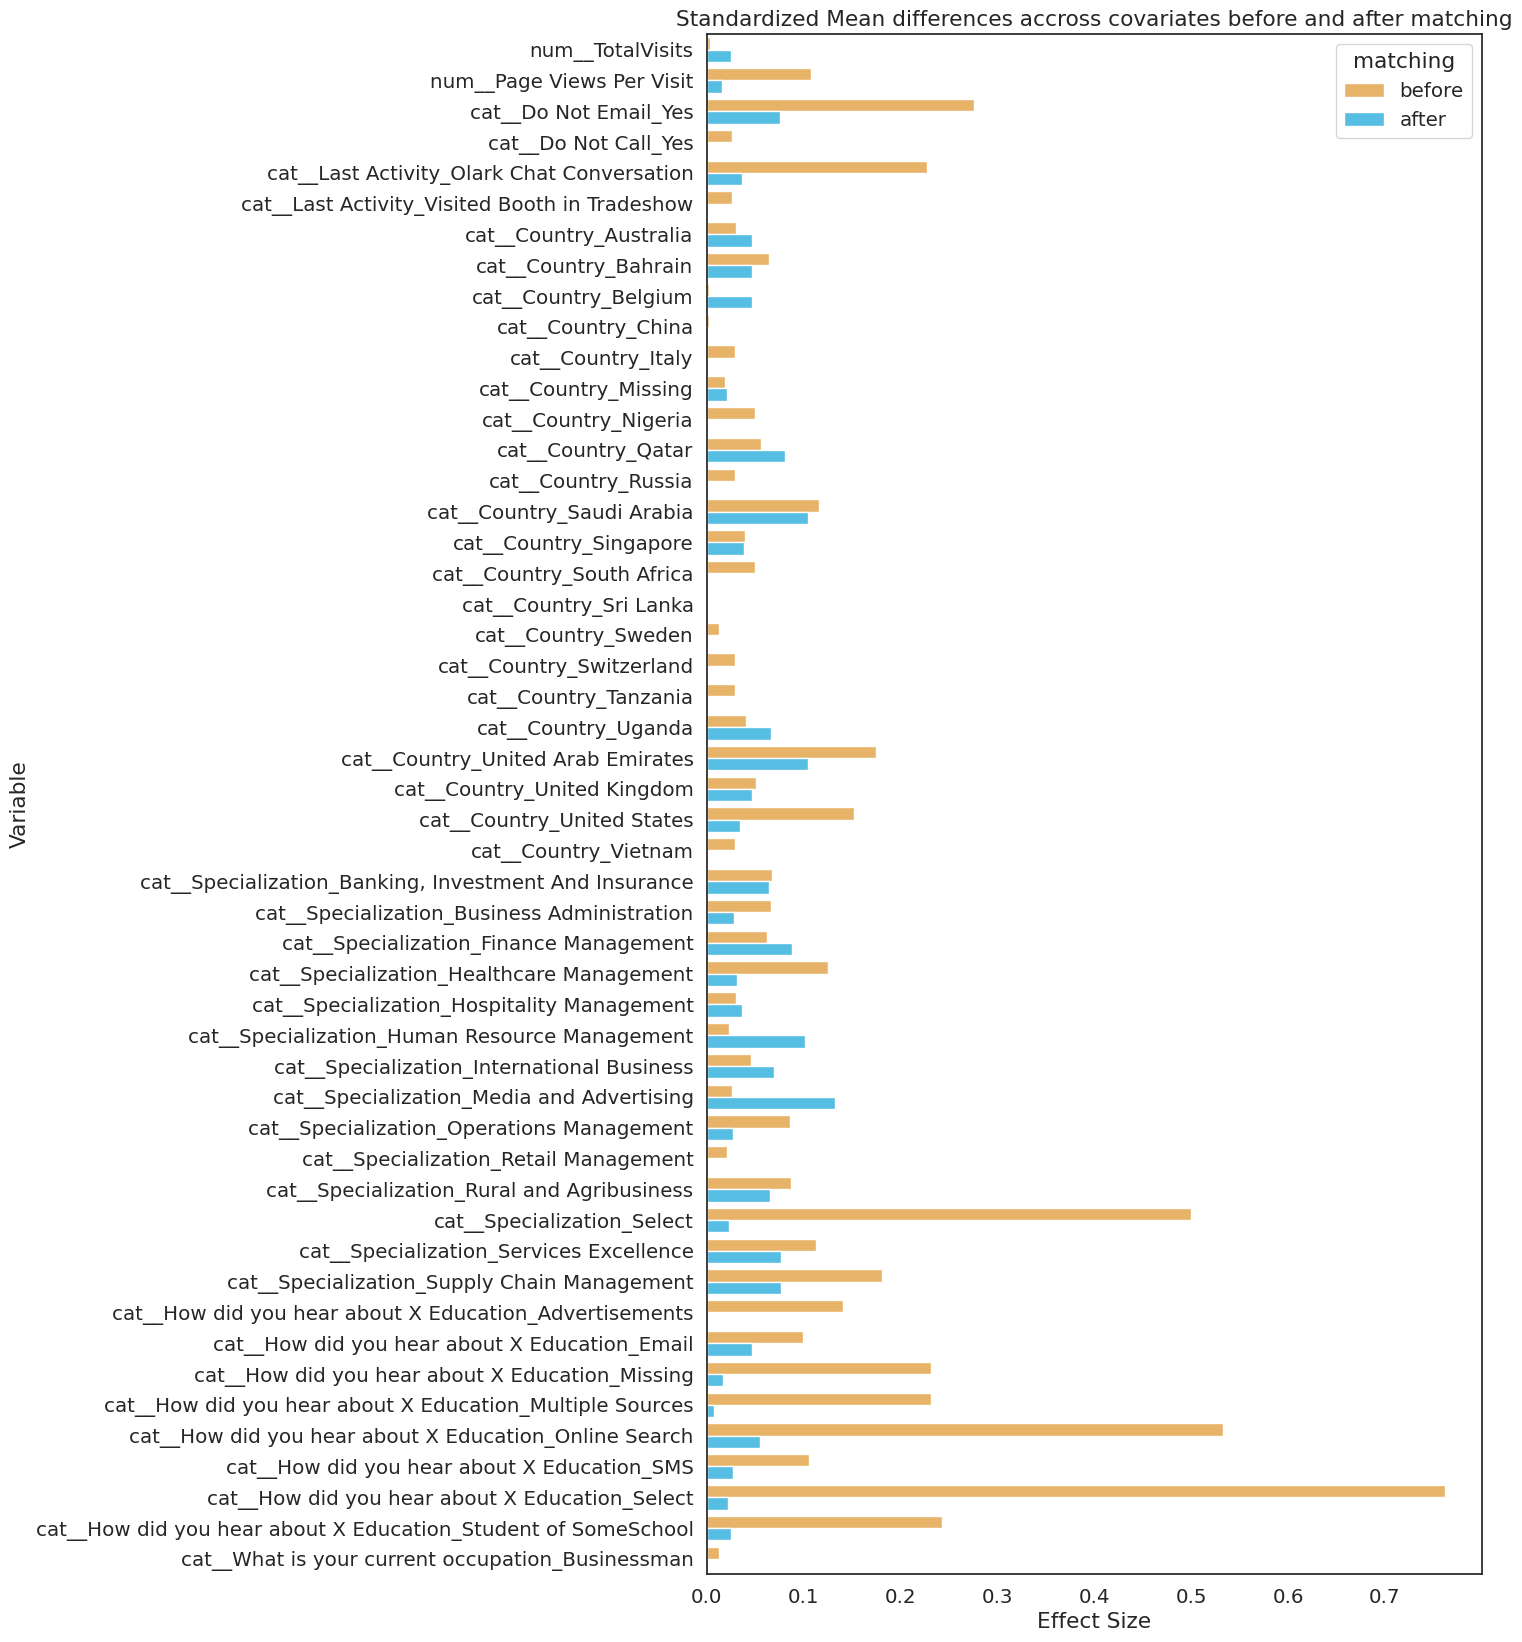

In [ ]:
sns.set(rc={'figure.figsize':(10,20)}, font_scale = 1.3)
psm.effect_size_plot(title='Standardized Mean differences accross covariates before and after matching', before_color='#FCB754', after_color='#3EC8FB', save=False)

In [ ]:
matched_df = psm.df_matched
matched_df

,Lead Number,num__TotalVisits,num__Page Views Per Visit,cat__Do Not Email_Yes,cat__Do Not Call_Yes,cat__Last Activity_Olark Chat Conversation,cat__Last Activity_Visited Booth in Tradeshow,cat__Country_Australia,cat__Country_Bahrain,cat__Country_Belgium,...,cat__How did you hear about X Education_Multiple Sources,cat__How did you hear about X Education_Online Search,cat__How did you hear about X Education_SMS,cat__How did you hear about X Education_Select,cat__How did you hear about X Education_Student of SomeSchool,cat__What is your current occupation_Businessman,propensity_score,propensity_logit,Lead Source Encoded,matched_ID
0,658852,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.131649,-1.886454,0,611456.0
1,658089,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.676963,0.739849,0,632143.0
2,658081,7.0,3.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.694499,0.821237,0,648798.0
3,657823,5.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.144925,-1.774974,0,634478.0
4,657313,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.089231,-2.323067,0,656685.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,645271,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.795705,1.359662,1,NaN
1836,636905,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.485147,-0.059429,1,NaN
1837,631540,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.823235,1.538418,1,NaN
1838,611873,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.909118,2.302909,1,NaN


In [ ]:
matched_df.loc[(matched_df['Lead Number']==658852)|(matched_df['Lead Number']==595710)]

,Lead Number,num__TotalVisits,num__Page Views Per Visit,cat__Do Not Email_Yes,cat__Do Not Call_Yes,cat__Last Activity_Olark Chat Conversation,cat__Last Activity_Visited Booth in Tradeshow,cat__Country_Australia,cat__Country_Bahrain,cat__Country_Belgium,...,cat__How did you hear about X Education_Multiple Sources,cat__How did you hear about X Education_Online Search,cat__How did you hear about X Education_SMS,cat__How did you hear about X Education_Select,cat__How did you hear about X Education_Student of SomeSchool,cat__What is your current occupation_Businessman,propensity_score,propensity_logit,Lead Source Encoded,matched_ID
0,658852,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.131649,-1.886454,0,611456.0
1659,595710,3.0,1.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.604808,0.425540,1,NaN


In [ ]:
scoring_df = matched_df[['Lead Number','Lead Source Encoded', 'matched_ID']].set_index('Lead Number')
join_df = exp_df.copy()
join_df = join_df[['Lead Number','Converted']].set_index('Lead Number')

scoring_df = scoring_df.join(join_df)

direct_traffic = scoring_df.loc[scoring_df['Lead Source Encoded']==0]
google = scoring_df.loc[scoring_df['Lead Source Encoded']==1]

direct_traffic_conversion_rate = np.mean(direct_traffic['Converted'])
google_conversion_rate = np.mean(google['Converted'])

print(f'Direct Traffic Matched Conversion Rate: {direct_traffic_conversion_rate}')
print(f'Google Matched Conversion Rate: {google_conversion_rate}')

Direct Traffic Matched Conversion Rate: 0.31956521739130433
Google Matched Conversion Rate: 0.44021739130434784


# Occupation Experiment - Do Not Use

In [ ]:
#summary by lead source
rollup = df.groupby(['What is your current occupation','Converted']).size().reset_index(name='Count')
rollup = rollup.pivot(index='What is your current occupation', columns='Converted', values='Count').fillna(0)
rollup
rollup['Conversion Rate'] = rollup[1]/(rollup[0]+rollup[1])
rollup['conversion_odds'] = rollup['Conversion Rate']/(1-rollup['Conversion Rate'])
rollup.sort_values('Conversion Rate', ascending=False)

Converted,0,1,Conversion Rate,conversion_odds
What is your current occupation,,,,
Housewife,0.0,10.0,1.000000,inf
Working Professional,59.0,647.0,0.916431,10.966102
Businessman,3.0,5.0,0.625000,1.666667
Other,6.0,10.0,0.625000,1.666667
Unemployed,3159.0,2441.0,0.435893,0.772713
Student,132.0,78.0,0.371429,0.590909


In [ ]:
#Run again without lead scoring
df = pd.read_csv('Lead Scoring.csv')

#drop ID columns, columns with only 1 value (ie. all "No"), and columns that represent lead scoring or review assessment (may not be available at the time the lead comes in)
df = df.drop(columns=['Prospect ID','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                      'Get updates on DM Content','I agree to pay the amount through cheque',
                      'Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Asymmetrique Profile Score', 'Lead Quality','Tags'])

# Recreate the above cell model, on the entire dataset and get the coefficients

X = df.drop(columns=['Converted','Lead Number'])
y = df['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_transformed = preprocessor.fit_transform(X)

transformed_df = pd.DataFrame(X_transformed.toarray(),columns=preprocessor.get_feature_names_out(X.columns))
transformed_df['Converted'] = y
transformed_df['Lead Number'] = df['Lead Number']
transformed_df = transformed_df.set_index('Lead Number')
transformed_df.head()

,num__TotalVisits,num__Total Time Spent on Website,num__Page Views Per Visit,cat__Lead Origin_API,cat__Lead Origin_Landing Page Submission,cat__Lead Origin_Lead Add Form,cat__Lead Origin_Lead Import,cat__Lead Origin_Quick Add Form,cat__Lead Source_Click2call,cat__Lead Source_Direct Traffic,...,cat__Last Notable Activity_Had a Phone Conversation,cat__Last Notable Activity_Modified,cat__Last Notable Activity_Olark Chat Conversation,cat__Last Notable Activity_Page Visited on Website,cat__Last Notable Activity_Resubscribed to emails,cat__Last Notable Activity_SMS Sent,cat__Last Notable Activity_Unreachable,cat__Last Notable Activity_Unsubscribed,cat__Last Notable Activity_View in browser link Clicked,Converted
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
660728,5.0,674.0,2.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
660727,2.0,1532.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
660719,1.0,305.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
660681,2.0,1428.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
transformed_df['cat__What is your current occupation_Working Professional']

Lead Number
660737    0.0
660728    0.0
660727    0.0
660719    0.0
660681    0.0
         ... 
579564    0.0
579546    0.0
579545    0.0
579538    0.0
579533    0.0
Name: cat__What is your current occupation_Working Professional, Length: 9240, dtype: float64

In [ ]:
coefficients = list(zip(preprocessor.get_feature_names_out(X.columns), lr.coef_[0]))

important_features = []

for i in coefficients:
  if i[1] != 0:
    important_features.append(i[0])

important_features
important_features.append('Converted')
important_features.append('cat__What is your current occupation_Working Professional')

In [ ]:
exp_df = transformed_df[important_features]
exp_df['cat__What is your current occupation_Working Professional']

Lead Number
660737    0.0
660728    0.0
660727    0.0
660719    0.0
660681    0.0
         ... 
579564    0.0
579546    0.0
579545    0.0
579538    0.0
579533    0.0
Name: cat__What is your current occupation_Working Professional, Length: 9240, dtype: float64

In [ ]:
drop_columns=[]

for i in exp_df.columns:
  if i == 'cat__What is your current occupation_Working Professional':
    continue
  elif 'cat__What is your current occupation' in i:
    drop_columns.append(i)

drop_columns

['cat__What is your current occupation_Businessman']

In [ ]:
exp_df = exp_df.drop(columns=drop_columns)
exp_df = exp_df.reset_index()
exp_df

,Lead Number,num__TotalVisits,num__Page Views Per Visit,cat__Lead Origin_API,cat__Lead Origin_Landing Page Submission,cat__Lead Source_Google,cat__Lead Source_Missing,cat__Lead Source_NC_EDM,cat__Lead Source_Olark Chat,cat__Lead Source_Organic Search,...,cat__How did you hear about X Education_Advertisements,cat__How did you hear about X Education_Email,cat__How did you hear about X Education_Missing,cat__How did you hear about X Education_Multiple Sources,cat__How did you hear about X Education_Online Search,cat__How did you hear about X Education_SMS,cat__How did you hear about X Education_Select,cat__How did you hear about X Education_Student of SomeSchool,Converted,cat__What is your current occupation_Working Professional
0,660737,0.0,0.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
1,660728,5.0,2.50,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
2,660727,2.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0
3,660719,1.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,660681,2.0,1.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,8.0,2.67,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0
9236,579546,2.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
9237,579545,2.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0
9238,579538,3.0,3.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0


In [ ]:
psm = PsmPy(exp_df, treatment='cat__What is your current occupation_Working Professional',indx='Lead Number', exclude=['Converted'])
psm.logistic_ps(balance = True)

In [ ]:
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=0.2, drop_unmatched=True)

/usr/local/lib/python3.10/dist-packages/psmpy/psmpy.py:363: UserWarning: Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False
  warnings.warn('Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False')


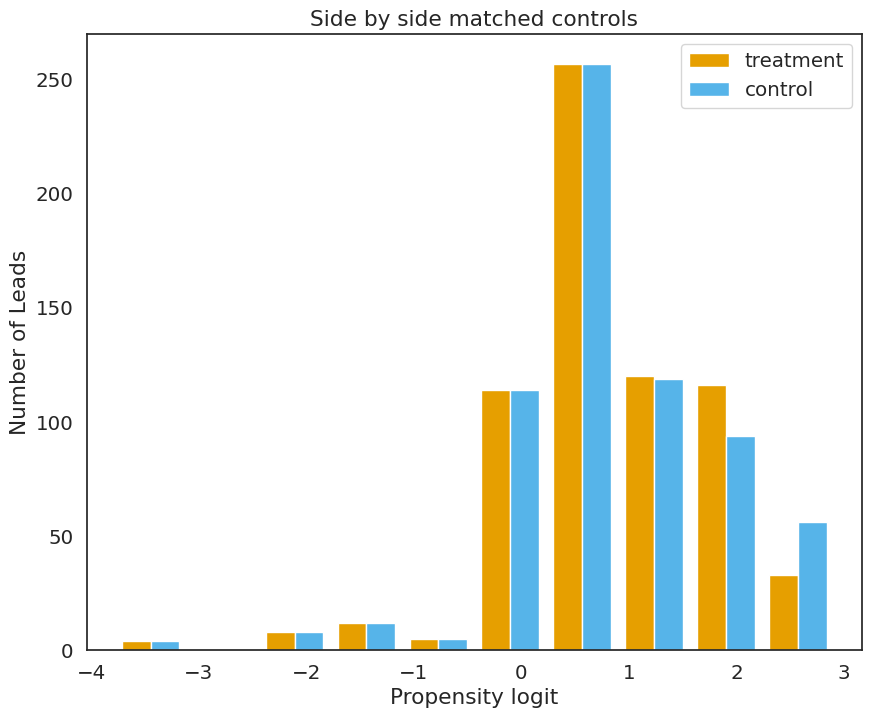

In [ ]:
from psmpy.plotting import *
sns.set(rc={'figure.figsize':(10,8)}, font_scale = 1.3)

psm.plot_match(Title='Side by side matched controls', Ylabel='Number of Leads', Xlabel= 'Propensity logit', names = ['treatment', 'control'], colors=['#E69F00', '#56B4E9'] ,save=True)

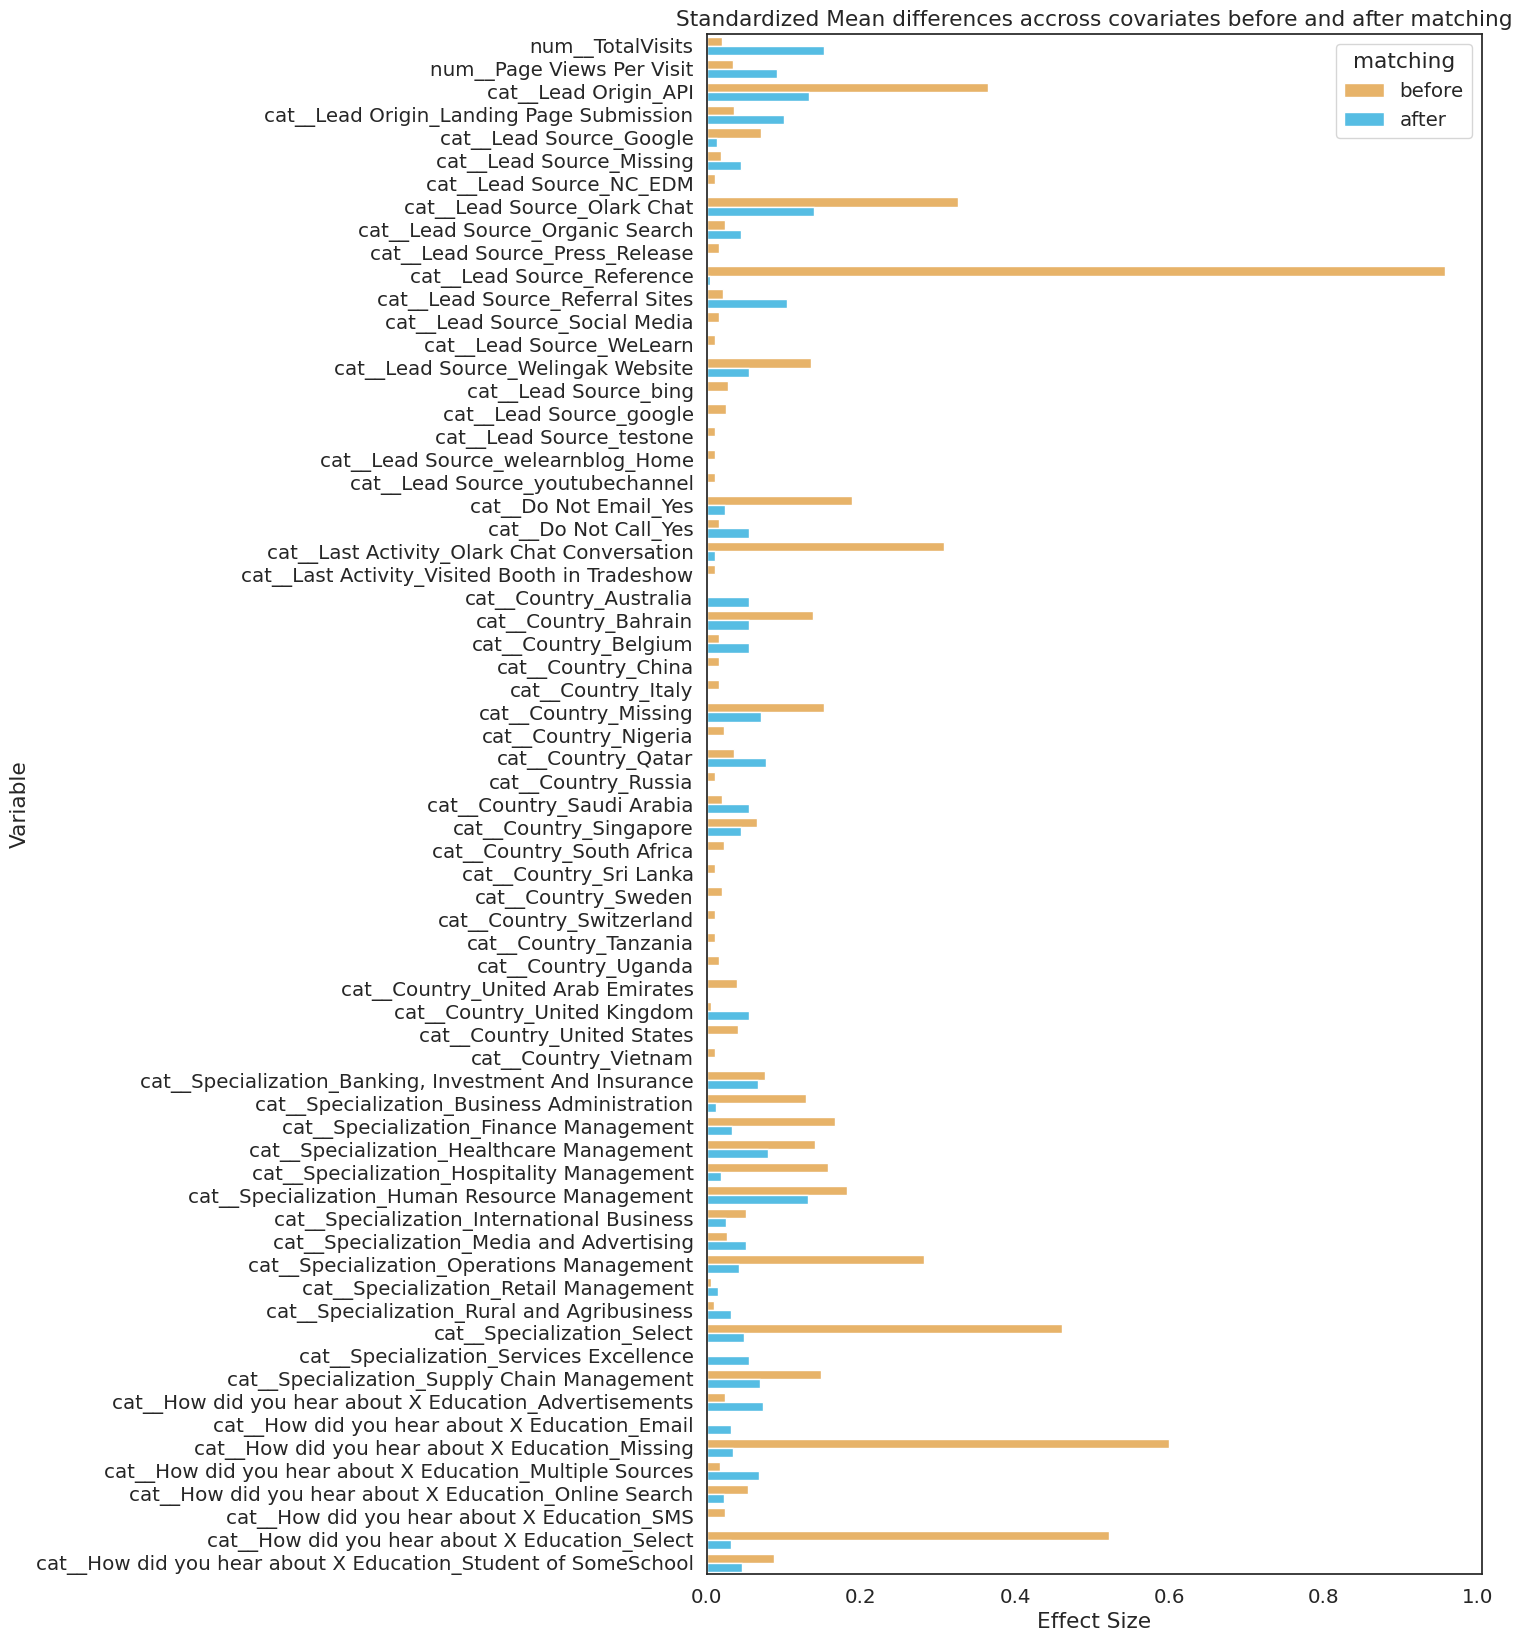

In [ ]:
sns.set(rc={'figure.figsize':(10,20)}, font_scale = 1.3)
psm.effect_size_plot(title='Standardized Mean differences accross covariates before and after matching', before_color='#FCB754', after_color='#3EC8FB', save=False)

In [ ]:
matched_df = psm.df_matched
matched_df

,Lead Number,num__TotalVisits,num__Page Views Per Visit,cat__Lead Origin_API,cat__Lead Origin_Landing Page Submission,cat__Lead Source_Google,cat__Lead Source_Missing,cat__Lead Source_NC_EDM,cat__Lead Source_Olark Chat,cat__Lead Source_Organic Search,...,cat__How did you hear about X Education_Missing,cat__How did you hear about X Education_Multiple Sources,cat__How did you hear about X Education_Online Search,cat__How did you hear about X Education_SMS,cat__How did you hear about X Education_Select,cat__How did you hear about X Education_Student of SomeSchool,propensity_score,propensity_logit,cat__What is your current occupation_Working Professional,matched_ID
0,660267,5.0,5.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.617499,0.478944,1,596284.0
1,659889,4.0,4.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.708718,0.889168,1,660174.0
2,659727,6.0,3.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.448653,-0.206114,1,610473.0
3,659710,3.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.936492,2.690977,1,599501.0
4,659704,0.0,0.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.811497,1.459765,1,634217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,593063,3.0,3.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.539960,0.160183,0,NaN
1334,583616,5.0,1.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.417852,-0.331599,0,NaN
1335,590341,4.0,4.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.598371,0.398682,0,NaN
1336,603015,2.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.406668,-0.377755,0,NaN


In [ ]:
scoring_df = matched_df[['Lead Number','cat__What is your current occupation_Working Professional', 'matched_ID']].set_index('Lead Number')
join_df = exp_df.copy()
join_df = join_df[['Lead Number','Converted']].set_index('Lead Number')

scoring_df = scoring_df.join(join_df)

other = scoring_df.loc[scoring_df['cat__What is your current occupation_Working Professional']==0]
working_professional = scoring_df.loc[scoring_df['cat__What is your current occupation_Working Professional']==1]

other_conversion_rate = np.mean(other['Converted'])
working_professional_conversion_rate = np.mean(working_professional['Converted'])

print(f'Non-Working Professional Matched Conversion Rate: {other_conversion_rate}')
print(f'Working Professional Matched Conversion Rate: {working_professional_conversion_rate}')

Non-Working Professional Matched Conversion Rate: 0.5739910313901345
Working Professional Matched Conversion Rate: 0.9162929745889388


# Association Rules

In [ ]:
#Run again without lead scoring
df = pd.read_csv('Lead Scoring.csv')

#drop ID columns, columns with only 1 value (ie. all "No"), and columns that represent lead scoring or review assessment (may not be available at the time the lead comes in)
df = df.drop(columns=['Prospect ID','Lead Number','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                      'Get updates on DM Content','I agree to pay the amount through cheque',
                      'Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Asymmetrique Profile Score', 'Lead Quality','Tags'])

#Change Yes/No columns to 1/0
for col in df.columns:
  if df[col][0] == 'No':
    df[col] = [1 if value == 'Yes' else 0 for value in df[col]]


#Combine rara categories into "other"
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# lets apply this functino to our data with mincount=10
#CombineRareCategories(df, 10)
CombineRareCategories(df, 150)

df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,...,0,0,0,0,0,0,Select,Select,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,Select,Select,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,Potential Lead,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Other_Last Activity,India,...,0,0,0,0,0,0,Select,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,0,0,0,Select,Mumbai,0,Modified


In [ ]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [ ]:
cat_col = ['Lead Source','Last Activity','Country','Specialization','How did you hear about X Education',
           'What is your current occupation','What matters most to you in choosing a course','Lead Profile','City' ]

for i in cat_col:
  df[i] = df[i].fillna('missing')


num_col = ['TotalVisits','Page Views Per Visit']

for i in num_col:
  median = np.nanpercentile(df[i],50)
  df[i] = df[i].fillna(median)

df.isnull().sum()


Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [ ]:
df = pd.get_dummies(df)
df

num_col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

for i in df.columns:
  if i in num_col:
    continue
  else:
    df[i] = df[i].astype(bool)

df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,City_Select,City_Thane & Outskirts,City_missing,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,False,False,False,0.0,0,0.0,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,False,False,False,5.0,674,2.5,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,True,2.0,1532,2.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,1.0,305,1.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,True,2.0,1428,1.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
apriori_df = df.copy()#.drop(columns=num_col)
apriori_df = apriori_df[[
'Converted',
'Lead Source_Direct Traffic',
#'Lead Source_Facebook',
'Lead Source_Google',
'Lead Source_Olark Chat',
'Lead Source_Organic Search',
'Lead Source_Other_Lead Source',
'Lead Source_Reference',
#'Lead Source_Referral Sites',
#'Lead Source_Welingak Website',
'Lead Source_missing',
#'How did you hear about X Education_Advertisements',
#'How did you hear about X Education_Email',
#'How did you hear about X Education_Multiple Sources',
#'How did you hear about X Education_Online Search',
#'How did you hear about X Education_Other',
#'How did you hear about X Education_SMS',
#'How did you hear about X Education_Select',
#'How did you hear about X Education_Social Media',
#'How did you hear about X Education_Student of SomeSchool',
#'How did you hear about X Education_Word Of Mouth',
#'How did you hear about X Education_missing',
#'What is your current occupation_Housewife',
#'What is your current occupation_Other',
'What is your current occupation_Other_What is your current occupation',
'What is your current occupation_Student',
'What is your current occupation_Unemployed',
'What is your current occupation_Working Professional',
'What is your current occupation_missing',
#'Last Notable Activity_Email Bounced',
#'Last Notable Activity_Email Link Clicked',
#'Last Notable Activity_Email Opened',
#'Last Notable Activity_Had a Phone Conversation',
#'Last Notable Activity_Modified',
#'Last Notable Activity_Olark Chat Conversation',
#'Last Notable Activity_Other_Last Notable Activity',
#'Last Notable Activity_Page Visited on Website',
#'Last Notable Activity_SMS Sent',
#'Last Notable Activity_Unreachable',
#'Last Notable Activity_Unsubscribed',
]]

#pd.options.display.max_columns = None
#apriori_df
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(apriori_df, min_support=0.001, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets


,support,itemsets,length
0,0.385390,(Converted),1
1,0.275216,(Lead Source_Direct Traffic),1
2,0.310390,(Lead Source_Google),1
3,0.189935,(Lead Source_Olark Chat),1
4,0.124892,(Lead Source_Organic Search),1
...,...,...,...
63,0.019372,"(Converted, What is your current occupation_Un...",3
64,0.001948,"(Converted, Lead Source_Reference, What is you...",3
65,0.031602,"(Converted, What is your current occupation_Un...",3
66,0.018831,"(Converted, Lead Source_Reference, What is you...",3


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, min_threshold=0.05)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         142 non-null    object 
 1   consequents         142 non-null    object 
 2   antecedent support  142 non-null    float64
 3   consequent support  142 non-null    float64
 4   support             142 non-null    float64
 5   confidence          142 non-null    float64
 6   lift                142 non-null    float64
 7   leverage            142 non-null    float64
 8   conviction          142 non-null    float64
 9   zhangs_metric       142 non-null    float64
dtypes: float64(8), object(2)
memory usage: 11.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Converted),(Lead Source_Direct Traffic),0.385390,0.275216,0.088528,0.229711,0.834655,-0.017537,0.940924,-0.243752
1,(Lead Source_Direct Traffic),(Converted),0.275216,0.385390,0.088528,0.321667,0.834655,-0.017537,0.906060,-0.214653
2,(Converted),(Lead Source_Google),0.385390,0.310390,0.124134,0.322101,1.037730,0.004513,1.017275,0.059156
3,(Lead Source_Google),(Converted),0.310390,0.385390,0.124134,0.399930,1.037730,0.004513,1.024232,0.052722
4,(Converted),(Lead Source_Olark Chat),0.385390,0.189935,0.048485,0.125807,0.662370,-0.024714,0.926644,-0.453359


In [ ]:
pd.set_option('display.max_colwidth', None)

rules.loc[(rules['consequents']=={'Converted'})&(rules['support']>0.01)&(rules['confidence']>=0.4)].sort_values(by='confidence')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
93,"(What is your current occupation_Unemployed, Lead Source_Olark Chat)",(Converted),0.085281,0.38539,0.035606,0.417513,1.083352,0.002740,1.055148,0.084112
16,(What is your current occupation_Unemployed),(Converted),0.606061,0.38539,0.264177,0.435893,1.131045,0.030608,1.089528,0.294110
78,"(Lead Source_Google, What is your current occupation_Unemployed)",(Converted),0.194481,0.38539,0.087662,0.450751,1.169599,0.012712,1.119002,0.180016
9,(Lead Source_Other_Lead Source),(Converted),0.037879,0.38539,0.020887,0.551429,1.430834,0.006289,1.370151,0.312962
122,"(Lead Source_Other_Lead Source, What is your current occupation_Unemployed)",(Converted),0.028788,0.38539,0.019372,0.672932,1.746109,0.008278,1.879154,0.439964
67,"(Lead Source_Direct Traffic, What is your current occupation_Working Professional)",(Converted),0.019481,0.38539,0.017316,0.888889,2.306468,0.009808,5.531494,0.577690
130,"(What is your current occupation_Unemployed, Lead Source_Reference)",(Converted),0.035498,0.38539,0.031602,0.890244,2.309984,0.017921,5.599784,0.587968
84,"(Lead Source_Google, What is your current occupation_Working Professional)",(Converted),0.021429,0.38539,0.019372,0.904040,2.345783,0.011114,6.404887,0.586266
18,(What is your current occupation_Working Professional),(Converted),0.076407,0.38539,0.070022,0.916431,2.377933,0.040575,7.354490,0.627405
11,(Lead Source_Reference),(Converted),0.057792,0.38539,0.053030,0.917603,2.380975,0.030758,7.459135,0.615580


# Optimization

In [ ]:
grid

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Converted,0,1,Conversion Rate,conversion_odds,Total Leads,Total Course Sold,Total Revenue,Cost Per Click,Marketing Spend,Sales Costs,marketing_ROI,Total ROI
Lead Source,,,,,,,,,,,,
Direct Traffic,1725,818,0.321667,0.474203,2543,818,162782,1.10,2797.30,29520,57.192543,4.036993
Google,1721,1147,0.399930,0.666473,2868,1147,228253,2.00,5736.00,34415,38.793061,4.684865
Olark Chat,1307,448,0.255271,0.342770,1755,448,89152,1.15,2018.25,19790,43.172922,3.087994
Organic Search,718,436,0.377816,0.607242,1154,436,86764,1.90,2192.60,13720,38.571285,4.452534
Other_Lead Source,157,193,0.551429,1.229299,350,193,38407,0.60,210.00,4465,181.890476,7.215401
Reference,44,490,0.917603,11.136364,534,490,97510,0.50,267.00,7790,364.205993,11.102520


In [ ]:
total_roi = grid['Total ROI'].sum()
grid['roi_weight'] = grid['Total ROI']/total_roi

budget = 10000

sim_grid = grid.copy()
sim_grid = pd.DataFrame(sim_grid)
sim_grid = sim_grid[['Conversion Rate','Cost Per Click', 'roi_weight']]
sim_grid['investment'] = budget * sim_grid['roi_weight']
sim_grid['leads'] = sim_grid['investment']/sim_grid['Cost Per Click']
sim_grid['converted'] = sim_grid['leads'] * sim_grid['Conversion Rate']
sim_grid['revenue'] = sim_grid['converted'] * 199
sim_grid['prev_lead_proportion'] = grid['Total Leads'] / grid['Total Leads'].sum()
sim_grid['post_lead_proportion'] = sim_grid['leads'] / sim_grid['leads'].sum()
sim_grid['pre_post_change_ppts'] = sim_grid['post_lead_proportion'] - sim_grid['prev_lead_proportion']

sim_grid

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Converted,Conversion Rate,Cost Per Click,roi_weight,investment,leads,converted,revenue,prev_lead_proportion,post_lead_proportion,pre_post_change_ppts
Lead Source,,,,,,,,,,
Direct Traffic,0.321667,1.10,0.116743,1167.425329,1061.295753,341.384163,6.793545e+04,0.276293,0.081066,-0.195227
Google,0.399930,2.00,0.135478,1354.778227,677.389114,270.908408,5.391077e+04,0.311604,0.051742,-0.259862
Olark Chat,0.255271,1.15,0.089299,892.992149,776.514912,198.221470,3.944607e+04,0.190678,0.059313,-0.131365
Organic Search,0.377816,1.90,0.128759,1287.592540,677.680284,256.038652,5.095169e+04,0.125380,0.051764,-0.073616
Other_Lead Source,0.551429,0.60,0.208656,2086.563653,3477.606089,1917.651358,3.816126e+05,0.038027,0.265633,0.227606
Reference,0.917603,0.50,0.321065,3210.648102,6421.296204,5892.200637,1.172548e+06,0.058018,0.490483,0.432465


In [ ]:
total_roi = grid['Total ROI'].sum()
grid['roi_weight'] = grid['Total ROI']/total_roi

budget = 10000

sim_grid = grid.copy()
sim_grid = pd.DataFrame(sim_grid)
sim_grid = sim_grid[['Conversion Rate','Cost Per Click', 'roi_weight']]
sim_grid['investment'] = (budget * sim_grid['roi_weight'])
sim_grid['leads'] = sim_grid['investment']/sim_grid['Cost Per Click']
sim_grid['converted'] = sim_grid['leads'] * sim_grid['Conversion Rate']
sim_grid['revenue'] = sim_grid['converted'] * 199
sim_grid['prev_lead_proportion'] = grid['Total Leads'] / grid['Total Leads'].sum()
sim_grid['post_lead_proportion'] = sim_grid['leads'] / sim_grid['leads'].sum()
sim_grid['pre_post_change_ppts'] = sim_grid['post_lead_proportion'] - sim_grid['prev_lead_proportion']

sim_grid

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Converted,Conversion Rate,Cost Per Click,roi_weight,investment,leads,converted,revenue,prev_lead_proportion,post_lead_proportion,pre_post_change_ppts
Lead Source,,,,,,,,,,
Direct Traffic,0.321667,1.10,0.116743,1167.425329,1061.295753,341.384163,6.793545e+04,0.276293,0.081066,-0.195227
Google,0.399930,2.00,0.135478,1354.778227,677.389114,270.908408,5.391077e+04,0.311604,0.051742,-0.259862
Olark Chat,0.255271,1.15,0.089299,892.992149,776.514912,198.221470,3.944607e+04,0.190678,0.059313,-0.131365
Organic Search,0.377816,1.90,0.128759,1287.592540,677.680284,256.038652,5.095169e+04,0.125380,0.051764,-0.073616
Other_Lead Source,0.551429,0.60,0.208656,2086.563653,3477.606089,1917.651358,3.816126e+05,0.038027,0.265633,0.227606
Reference,0.917603,0.50,0.321065,3210.648102,6421.296204,5892.200637,1.172548e+06,0.058018,0.490483,0.432465
